# Принятие решений в бизнесе

**Описание проекта**

Аналитик крупного интернет-магазина. 

Вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.

Приоритизируйем гипотезы, запустим A/B-тест и проанализируем результаты. 

# Описание данных
## Файл hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


## Файл orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


## Файл visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="stage_1"></a>
# Часть 1. Приоритезация гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', 0)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
hypothesis.head(3)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
hypothesis.isnull().sum().sort_values()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [11]:
orders.isnull().sum().sort_values()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
visitors.isnull().sum().sort_values()

date        0
group       0
visitors    0
dtype: int64

In [13]:
hypothesis.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

<div class="alert alert-info">

**Вывод по блоку предобработки**

- Датасет visitors содержит информацию о гипотезах, охвате, влиянии, уверенности и затратах ресурсов на проверку. Пропусков и дубликатов нет.
- Датасет orders имеет сведения о заказах и группе A/B-теста, в которую попал заказ. Пропусков и дубликатов нет.
- Датасет visitors включает количество пользователей в указанную дату в указанной группе A/B-теста. Пропусков и дубликатов нет.
</div>

In [16]:
# Даты обработаем, c остальными данными порядок
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<a name="ice"></a>
### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [17]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [18]:
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


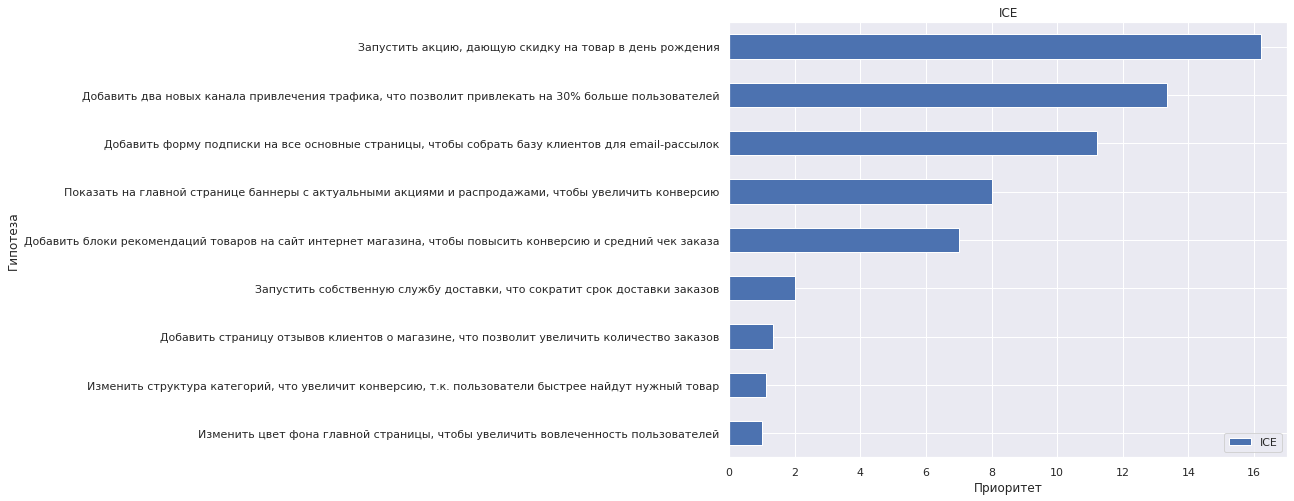

In [19]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

<a name="rice"></a>
### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

 

In [20]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [21]:
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


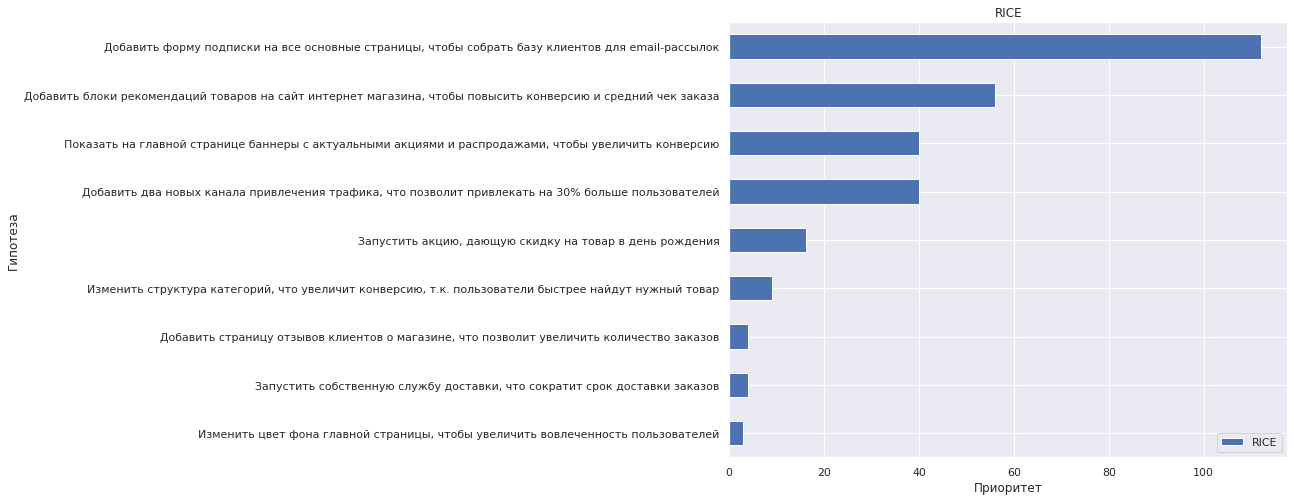

In [22]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

<a name="why"></a>
###  Приоритизация гипотез при применении RICE вместо ICE изменилась. Одна учитывает охват, а другая — нет.



| Нумерация гипотез ICE  | Нумерация гипотез RICE |
|:-:|:-:|
| 8 | 7 |
| 0 | 2 |
| 7 | 0 |
| 6 | 6 |
| 2 | 8 |

<a name="stage_2"></a>
# Часть 2. Анализ A/B-теста



<div class="alert alert-info">

Результат A/B-теста описан в переменных orders и visitors
    
 
</div>

In [23]:
# Переименуем столбцы
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [24]:
# Сделаем группировку
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [25]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [26]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [27]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [28]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


<a name="stage_2_1"></a>
### Построим график кумулятивной выручки по группам

 

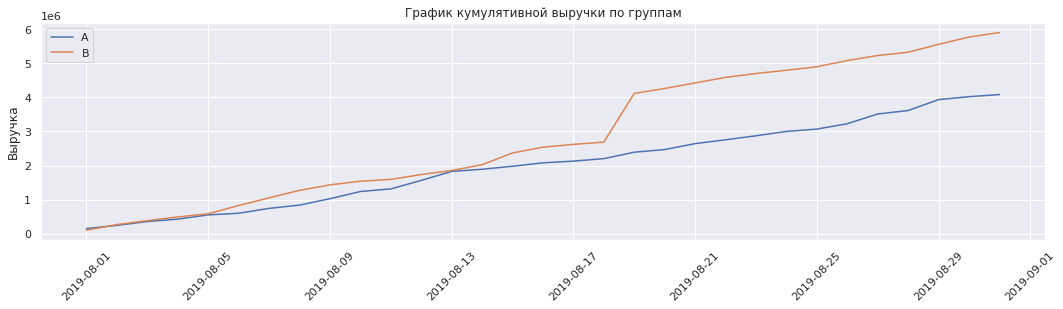

In [29]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-info">
    
Выручка группы А показывает равномерный, линейный рост.
Подобное можно наблюдать у группы В. Однако, с 17 по 21 августа присутствует резкий рост. Причиной может быть увеличение покупательной активности или очень дорогой заказ.
 
   
 
</div>

<a name="stage_2_2"></a>
### Построим график кумулятивного среднего чека по группам
 

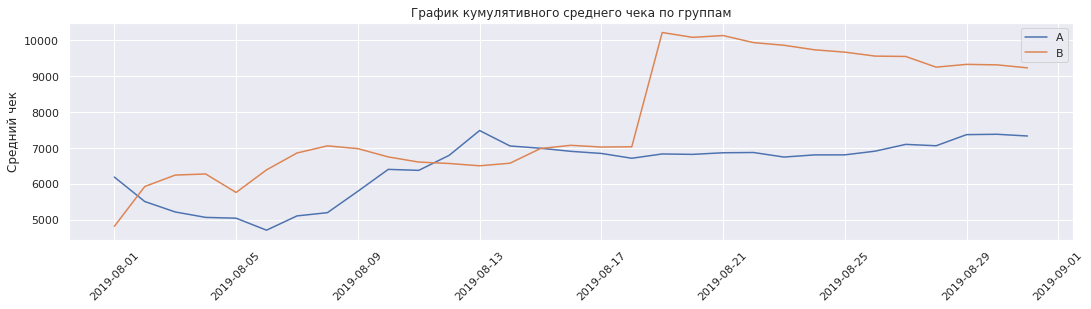

In [30]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-info">
    
 
В начале месяца у группы А были дешевые заказы. Средний чек группы стал равномерным с 15 августа, демонстрируя небольшое увеличение в конце месяца.
Дорогой заказ существенно повлиял на расчёт кумулятивного среднего чека для группы В. Однако начиная с 20 августа видим ежедневное снижение стоимости кумулятивного среднего чека в группе.
 
</div>

<a name="stage_2_3"></a>
### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

 

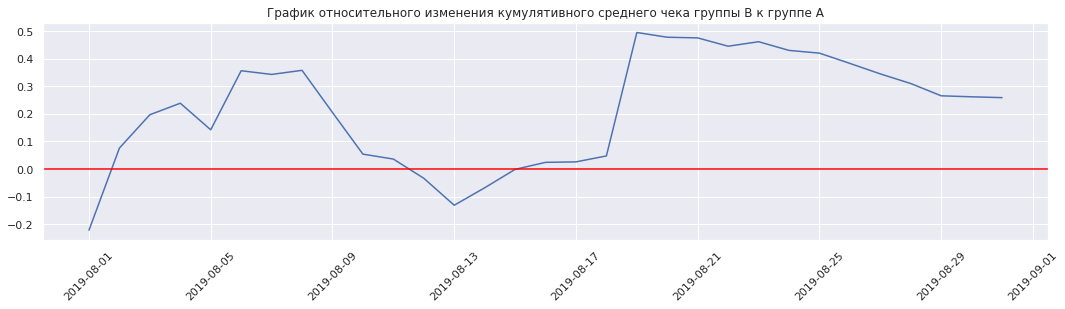

In [31]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(18,4))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">
    
Цель графика - показать временные периоды, в которые кумулятивные средний чек группы B выше среднего чека группы A, а так же выявить наличие аномальных значений.

В начале теста группа B отставала от группы A, затем вырвалась вперёд. Потом её конверсия снова падала, и резко возрастала. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы нельзя. Стоит проанализировать аномалии, возможно, они изменят картину. 
    

    
 
</div>



<a name="stage_2_4"></a>
### Построим график кумулятивного среднего количества заказов на посетителя по группам 


 

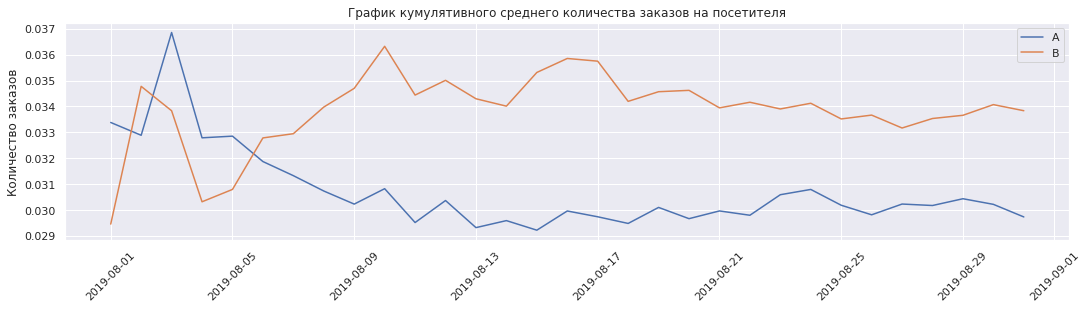

In [32]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div class="alert alert-info">

После пика у двух групп, кумулятивное среднее количество заказов на посетителя группы А находится в диапазоне от 0,029 до 0,031. Группы В от 0,037 до 0,033. Группа B пока выглядит лучше.
 
</div>

<a name="stage_2_5"></a>
### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

 

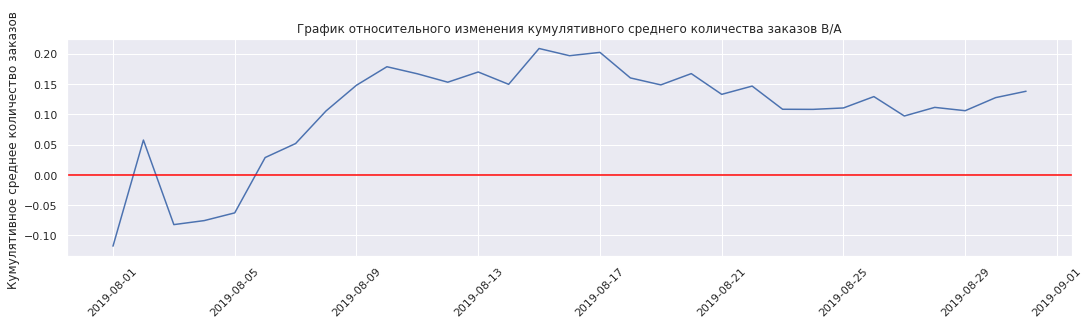

In [33]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(18,4))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов B/A')
plt.ylabel("Кумулятивное среднее количество заказов ")
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">

Группа B отставала от группы A, затем показала всплеск и с 06.08.2019 вырвалась вперёд. Пика достигла 15-17.08., далее стабилизировалась.
    
 
</div>

<a name="stage_2_6"></a>
### Построим точечный график количества заказов по пользователям


In [34]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})

In [35]:
orders_per_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


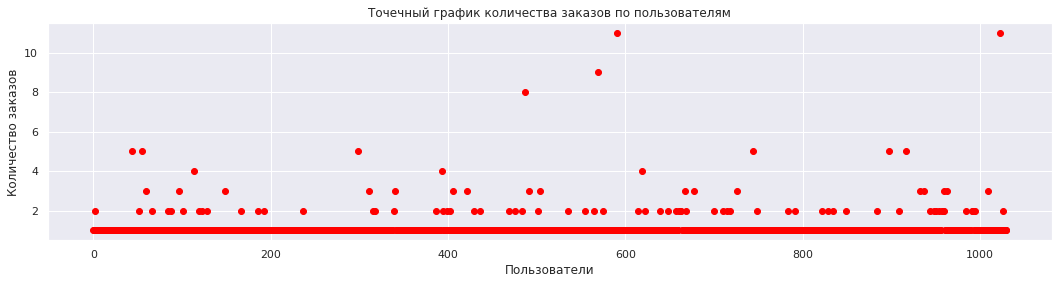

In [36]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.figure(figsize=(18,4))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

В основном покупают 1 раз, но есть и постоянные клиенты.

In [37]:
orders_per_user.groupby('orders')['visitorid'].count()

orders
1     937
2     64 
3     17 
4     3  
5     6  
8     1  
9     1  
11    2  
Name: visitorid, dtype: int64

<div class="alert alert-info">

В основном, один посетитель совершил один заказ. Незначительное число тех, кто совершил 2 или 3 заказа. 4 и более заказов - единичные случаи.
    
 
</div>

<a name="stage_2_7"></a>
### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

 

In [38]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [39]:
orders_per_user['orders'].max()

11

In [40]:
np.ptp(orders_per_user['orders'], axis=0)

10

In [41]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorid'].to_list()

Все, что за 99 перцентилем — аномально.

<a name="stage_2_8"></a>
### Построим точечный график стоимостей заказов

 

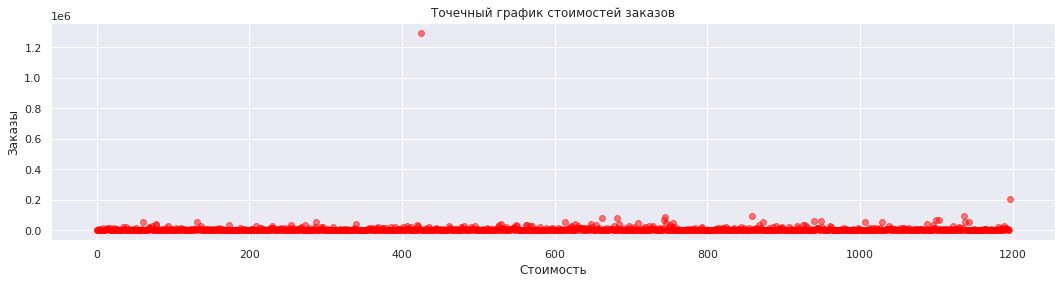

In [42]:
plt.figure(figsize=(18,4))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red', alpha=.5)
plt.title('Точечный график стоимостей заказов')
plt.ylabel("Заказы")
plt.xlabel("Стоимость")
plt.show()

Видны 2 отчетливых выброса, которые вызвали скачки на графиках выше. 

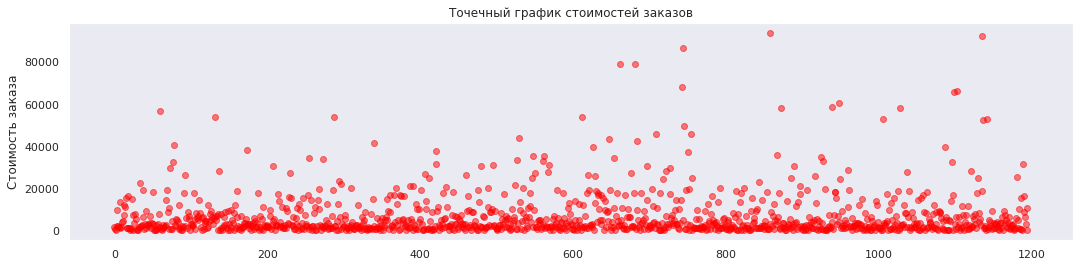

In [43]:
#создадим переменную с заказами стоимостью до 199000
orders_tmp = orders.query('revenue < 199000')

plt.figure(figsize=(18,4))
x_values = pd.Series(range(0,len(orders_tmp['revenue'])))
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.grid()
plt.scatter(x_values, orders_tmp['revenue'], color='red', alpha=.5);

<div class="alert alert-info">

Так как принято отсеивать от 1% до 5% наблюдений с крайними значениями, установим верхнюю границу платежа - 98 перцентиль в 45000
    
 
</div>


<a name="stage_2_9"></a>
### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

 

In [44]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [45]:
orders['revenue'].max()

1294500

In [46]:
np.ptp(orders['revenue'], axis=0)

1294450

Все, что за 99 перцентилем — аномально.

<a name="stage_2_10"></a>
### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

 

In [47]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


**Содержание таблицы:**

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

**Сформулируем гипотезы**

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем количестве заказов между группами есть.

alpha = 0.05

In [48]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего числа заказов группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


<div class="alert alert-info">

p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 

По «сырым» данным есть различия в среднем количестве заказов между группами.
Относительное лидерство группы B равно 13.8%.
 
</div>

<a name="stage_2_11"></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

 

<div class="alert alert-info">

Нулевая гипотеза: различий в среднем чеке между группами нет. 
    
Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.    
 
</div>


In [49]:
# найдём относительные различия в среднем чеке между группами:
print('p-value = {0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия = {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))  

p-value = 0.729
Относительные различия = 0.259


<div class="alert alert-info">
 
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
Средний чек группы B выше среднего чека группы A на 26%.

Вероятно, из-за аномальных выбросов в группе В тест не показал, что разница в 26% не является статистически значимой.    
 
</div> 
 


<a name="stage_2_12"></a>
### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

 

<div class="alert alert-info">
 
Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 45 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.     
 
</div>



In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(orders_per_user['orders'], [95, 98])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(orders_per_user['orders'], [95, 98])[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 98])[1]]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
print('Количество аномальных пользователей =', abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
dtype: int64

Количество аномальных пользователей = 29


<div class="alert alert-info">
 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

**Сформулируем гипотезы.**

Нулевая: различий в среднем количестве заказов между группами нет.
    
Альтернативная: различия в среднем количестве заказов между группами есть.    
 
</div>

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)    

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [52]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B = {0:.3f}' \
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.010
Относительный прирост среднего числа заказов группы B = 0.161


<div class="alert alert-info">
 
p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. отвергаем. Значит по «очищенным», как и по «сырым» есть различия в среднем количестве заказов между группами.
Относительный выигрыш группы B равен 18.5%. По «сырым» данным выигрыш - 13.8%

Результаты по среднему количеству заказов практически не изменились. Посмотрим, что с результатами по среднему чеку.    
 
</div>

<a name="stage_2_13"></a>
### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


**Сформулируем гипотезы.**

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [53]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные различия = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.768
Относительные различия = 0.041


<div class="alert alert-info">
 
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

После исключения самых дорогих заказов средний чек группы B стал еще выше среднего чека группы A на 4,1%, против 25% по «сырым» данным.    
 
</div>



<a name="stage_2_14"></a>
### Построим график кумулятивной выручки на посетителя по очищенным данным

In [54]:
orders.sort_values('revenue', ascending=False).head()

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


In [55]:
#Удалим 2 явных выброса
orders.sort_values('revenue', ascending=False).drop(labels=[425, 1196], axis=0).head()

,transactionid,visitorid,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A


In [56]:
#Удалим аномальных пользователей
orders_clean = orders[np.logical_not(orders['visitorid'].isin(abnormalUsers))]
orders_clean.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [57]:
orders_per_user.head(1)

,visitorid,orders
0,5114589,1


In [58]:
# объединим таблицы 
orders_merge = orders_clean.merge(orders_per_user, how='left')
orders_merge = orders_merge.loc[orders_merge['orders'] < 4]
orders_merge.sort_values('revenue', ascending=False).head()

,transactionid,visitorid,date,revenue,group,orders
497,3970235543,2912540959,2019-08-19,43990,A,1
607,1646402801,382846391,2019-08-26,43690,A,1
641,3964942202,358944393,2019-08-29,42740,A,1
316,2216192667,834731816,2019-08-25,41450,B,1
71,773663763,3288820196,2019-08-16,40740,B,1


In [59]:
#Удалим аномальных пользователей
orders_merge[np.logical_not(orders_merge['orders'].isin(abnormalUsers))]

,transactionid,visitorid,date,revenue,group,orders
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,3797467345,1196621759,2019-08-15,9759,B,1
4,2282983706,2322279887,2019-08-15,2308,B,1
...,...,...,...,...,...,...
1104,38478481,1197745035,2019-08-14,8600,B,1
1105,3592955527,608641596,2019-08-14,16490,B,1
1106,2662137336,3733762160,2019-08-14,6490,B,1
1107,2203539145,370388673,2019-08-14,3190,A,1


In [60]:
# Сделаем группировку
orders_group = (orders_merge.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_group['group_copy'] = orders_group['group']
orders_group = orders_group.set_index(['date','group'])
orders_cumsum = orders_group.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [61]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [62]:
cummulative_clean = orders_cumsum.join(visitors_cumsum[['visitors']])

In [63]:
cummulative_clean['average_check'] = cummulative_clean['revenue'] / cummulative_clean['orders']
cummulative_clean['conversion'] = cummulative_clean['orders'] / cummulative_clean['visitors']
cummulative_clean.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,"6,207.78",0.03
1,2019-08-01,B,19,19,78258,713,"4,118.84",0.03
2,2019-08-02,A,43,38,236601,1338,"5,502.35",0.03
3,2019-08-02,B,42,41,240301,1294,"5,721.45",0.03
4,2019-08-03,A,67,62,349074,1845,"5,210.06",0.04


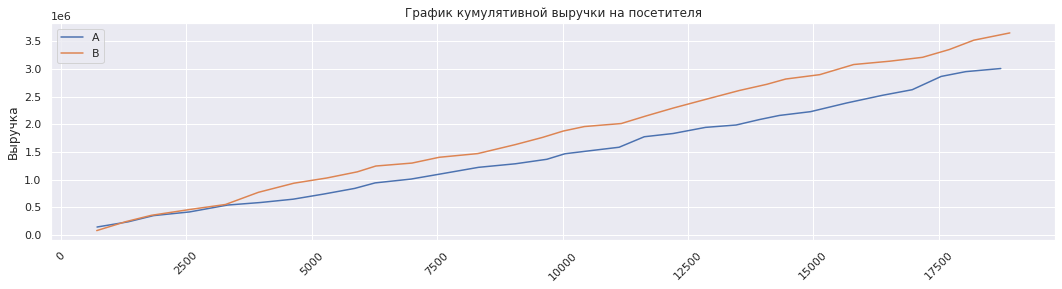

In [64]:
cummulativeA = cummulative_clean[cummulative['group']=='A'][['visitors', 'revenue']]
cummulativeB = cummulative_clean[cummulative['group']=='B'][['visitors', 'revenue']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки на посетителя')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Кумулятивная выручка группы А и группы В по очищенным данным показывает равномерный, линейный рост.

<a name="stage_2_14"></a>
### Построим график кумулятивного среднего чека на посетителя по очищенным данным

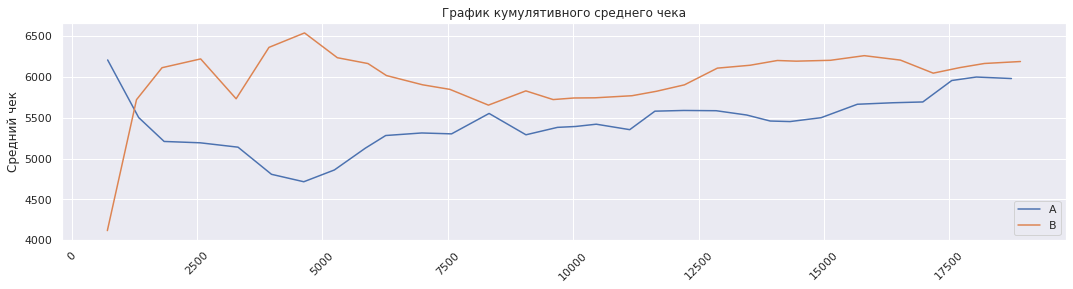

In [65]:
cummulativeA = cummulative_clean[cummulative_clean['group']=='A'][['visitors', 'average_check']]
cummulativeB = cummulative_clean[cummulative_clean['group']=='B'][['visitors', 'average_check']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека')
plt.ylabel("Средний чек")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Сначала у группы А дешевые заказы. Средний чек начинает увеличиваться с 4800 посетителей.

Кумулятивный средний чек для группы В сначале резко растёт, достигая пика около 4800 посетителей. Затем немного снижается и стабилизируется около 6000.

 <a name="stage_2_14"></a>
### Построим график кумулятивного среднего количества заказов на посетителя по очищенным данным

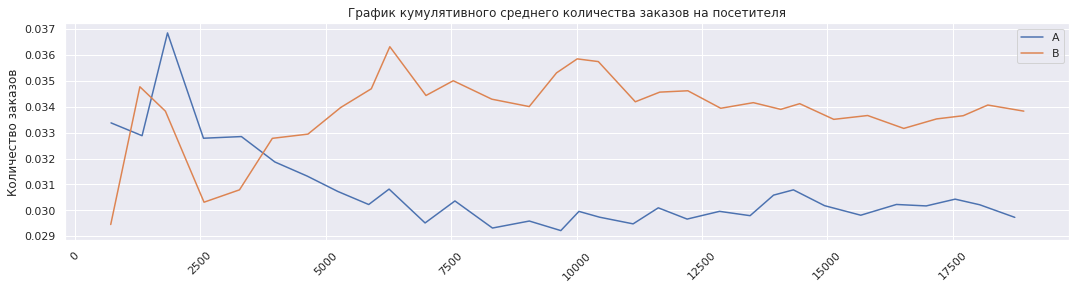

In [66]:
cummulativeA = cummulative[cummulative['group']=='A'][['visitors', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['visitors', 'conversion']]
plt.figure(figsize=(18,4))
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Сначала среднее количество заказов колебалось у обеих групп. Пересечение около 3000 посетителей.

Начиная с 2500 посетителей группа В показала рост и зафиксировала в дальнейшем значение в диапазоне от 0.033 до 0.036.

С 2000 посетителей группа А показала падение и зафиксировалась в диапазоне от 0.029 до 0.031.

<div class="alert alert-info">
   

**Вывод:**

- Статистическая значимость различий в среднем количестве заказов между группами по «сырым» и «очищенным» данным есть.

- P-value по «сырым» данным = 0.017
    
- P-value по «очищенным» данным = 0.007

- Относительный прирост среднего числа заказов группы B по «сырым» данным = 13.8%
    
- Относительный прирост среднего числа заказов группы B по «очищенным» данным = 18.5%

========================================================================================

- Статистическая значимость различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным отсутствует.

- P-value по «сырым» данным = 0.729
    
- P-value по «очищенным» данным = 0.768

- Относительные различия по «сырым» данным = 25%
    
- Относительные различия по «очищенным» данным = 4,1%

- Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий.
    
- Отсутствуют статистически значимые различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

- График различия конверсии между группами демонстрирует преимущество группы В над группой А
График различия среднего чека показывает хорошие результаты группы В
    
- Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. 
    
Показатели группы В лучше.
    
</div>